In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Social_Network_Ads (1).csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<Axes: xlabel='EstimatedSalary', ylabel='Age'>

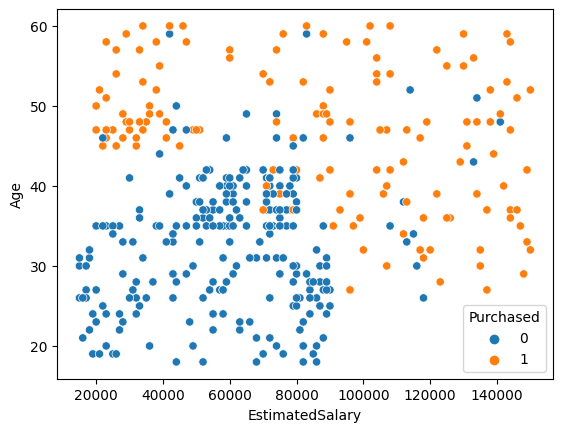

In [ ]:
sns.scatterplot(x='EstimatedSalary',y='Age',data=df,hue='Purchased')

In [ ]:
X = df.iloc[:,[2,3]].values
Y = df['Purchased'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 2)
(100, 2)
(300,)
(100,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


In [ ]:
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print("TP : ",TP)
print("FP : ",FP)
print("FN : ",FN)
print("TN : ",TN)

TP :  65
FP :  3
FN :  8
TN :  24


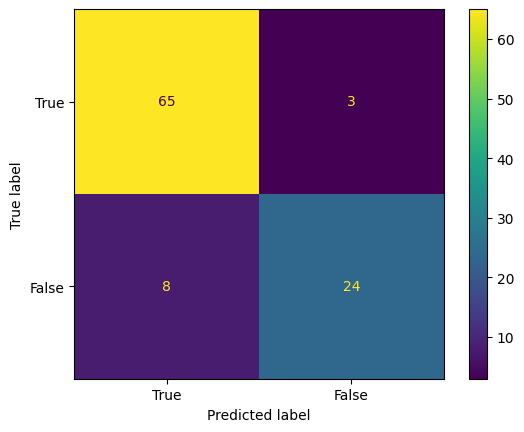

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[True,False])
cm_display.plot()

In [ ]:
accuracy = (TP+TN)/(TP+FP+FN+TN)
error_rate = 1 - accuracy
precision = (TP)/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(FP+TN)
f1_score = 2*precision*recall/(precision+recall)
print("Accuracy : ",accuracy)
print("Error rate : ",error_rate)
print("Precision : ",precision)
print("Recall : ",recall)
print("Specificity : ",specificity)
print("F1_score : ",f1_score)

Accuracy :  0.89
Error rate :  0.10999999999999999
Precision :  0.9558823529411765
Recall :  0.8904109589041096
Specificity :  0.8888888888888888
F1_score :  0.9219858156028369
